In [28]:
## Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [4]:
## Load Dataset
data = pd.read_csv('/content/NYPD_Shooting_Incident_Data__Historic_.csv')
data

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME       BORO LOC_OF_OCCUR_DESC  \
0         228798151   5/27/2021   21:30:00     QUEENS               NaN   
1         137471050   6/27/2014   17:40:00      BRONX               NaN   
2         147998800  11/21/2015    3:56:00     QUEENS               NaN   
3         146837977   10/9/2015   18:30:00      BRONX               NaN   
4          58921844   2/19/2009   22:58:00      BRONX               NaN   
...             ...         ...        ...        ...               ...   
27307     245029823   5/14/2022    3:02:00      BRONX           OUTSIDE   
27308     239583450   1/22/2022   13:15:00  MANHATTAN           OUTSIDE   
27309     246825728   6/18/2022    3:29:00  MANHATTAN           OUTSIDE   
27310     246876579   6/19/2022   20:08:00      BRONX            INSIDE   
27311     239861542   1/28/2022   18:14:00      BRONX           OUTSIDE   

       PRECINCT  JURISDICTION_CODE LOC_CLASSFCTN_DESC  \
0           105                0.0                NaN   
1            40                0.0                NaN   
2           108                0.0                NaN   
3            44                0.0                NaN   
4            47                0.0                NaN   
...         ...                ...                ...   
27307        48                0.0             STREET   
27308        30                0.0             STREET   
27309        32                0.0             STREET   
27310        46                2.0            HOUSING   
27311        45                0.0             STREET   

                   LOCATION_DESC  STATISTICAL_MURDER_FLAG  ... PERP_SEX  \
0                            NaN                    False  ...      NaN   
1                            NaN                    False  ...      NaN   
2                            NaN                     True  ...      NaN   
3                            NaN                    False  ...      NaN   
4                            NaN                     True  ...        M   
...                          ...                      ...  ...      ...   
27307                     (null)                    False  ...   (null)   
27308                     (null)                    False  ...        F   
27309                     (null)                    False  ...        M   
27310  MULTI DWELL - PUBLIC HOUS                    False  ...        M   
27311                     (null)                    False  ...        M   

            PERP_RACE VIC_AGE_GROUP VIC_SEX        VIC_RACE   X_COORD_CD  \
0                 NaN         18-24       M           BLACK  1058925.000   
1                 NaN         18-24       M           BLACK  1005028.000   
2                 NaN         25-44       M           WHITE  1007667.938   
3                 NaN           <18       M  WHITE HISPANIC  1006537.375   
4               BLACK         45-64       M           BLACK  1024921.813   
...               ...           ...     ...             ...          ...   
27307          (null)         18-24       M           BLACK  1011526.000   
27308  WHITE HISPANIC         25-44       M  WHITE HISPANIC   997458.000   
27309           BLACK         25-44       M           BLACK  1000999.000   
27310           BLACK         25-44       M  WHITE HISPANIC  1012980.000   
27311           BLACK         18-24       M           BLACK  1026549.000   

        Y_COORD_CD   Latitude  Longitude  \
0      180924.0000  40.662965 -73.730839   
1      234516.0000  40.810352 -73.924942   
2      209836.5313  40.742607 -73.915492   
3      244511.1406  40.837782 -73.919457   
4      262189.4063  40.886238 -73.852910   
...            ...        ...        ...   
27307  247828.0000  40.846864 -73.901413   
27308  240485.0000  40.826743 -73.952273   
27309  234464.0000  40.810209 -73.939496   
27310  251028.0000  40.855644 -73.896141   
27311  244293.0000  40.837102 -73.847134   

                                             Lon_Lat  
0      POINT (-73.73083

In [5]:
# Display basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

In [6]:
data.head()

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME    BORO LOC_OF_OCCUR_DESC  PRECINCT  \
0     228798151   5/27/2021   21:30:00  QUEENS               NaN       105   
1     137471050   6/27/2014   17:40:00   BRONX               NaN        40   
2     147998800  11/21/2015    3:56:00  QUEENS               NaN       108   
3     146837977   10/9/2015   18:30:00   BRONX               NaN        44   
4      58921844   2/19/2009   22:58:00   BRONX               NaN        47   

   JURISDICTION_CODE LOC_CLASSFCTN_DESC LOCATION_DESC  \
0                0.0                NaN           NaN   
1                0.0                NaN           NaN   
2                0.0                NaN           NaN   
3                0.0                NaN           NaN   
4                0.0                NaN           NaN   

   STATISTICAL_MURDER_FLAG  ... PERP_SEX PERP_RACE VIC_AGE_GROUP VIC_SEX  \
0                    False  ...      NaN       NaN         18-24       M   
1                    False  ...      NaN       NaN         18-24       M   
2                     True  ...      NaN       NaN         25-44       M   
3                    False  ...      NaN       NaN           <18       M   
4                     True  ...        M     BLACK         45-64       M   

         VIC_RACE   X_COORD_CD   Y_COORD_CD   Latitude  Longitude  \
0           BLACK  1058925.000  180924.0000  40.662965 -73.730839   
1           BLACK  1005028.000  234516.0000  40.810352 -73.924942   
2           WHITE  1007667.938  209836.5313  40.742607 -73.915492   
3  WHITE HISPANIC  1006537.375  244511.1406  40.837782 -73.919457   
4           BLACK  1024921.813  262189.4063  40.886238 -73.852910   

                                         Lon_Lat  
0  POINT (-73.73083868899994 40.662964620000025)  
1   POINT (-73.92494232599995 40.81035186300006)  
2   POINT (-73.91549174199997 40.74260663300004)  
3   POINT (-73.91945661499994 40.83778200300003)  
4   POINT (-73.85290950899997 40.88623791800006)  

[5 rows x 21 columns]

## Data Preprocessing

In [7]:
# Handle missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64


In [8]:
data_numeric = data.select_dtypes(include=[np.number])

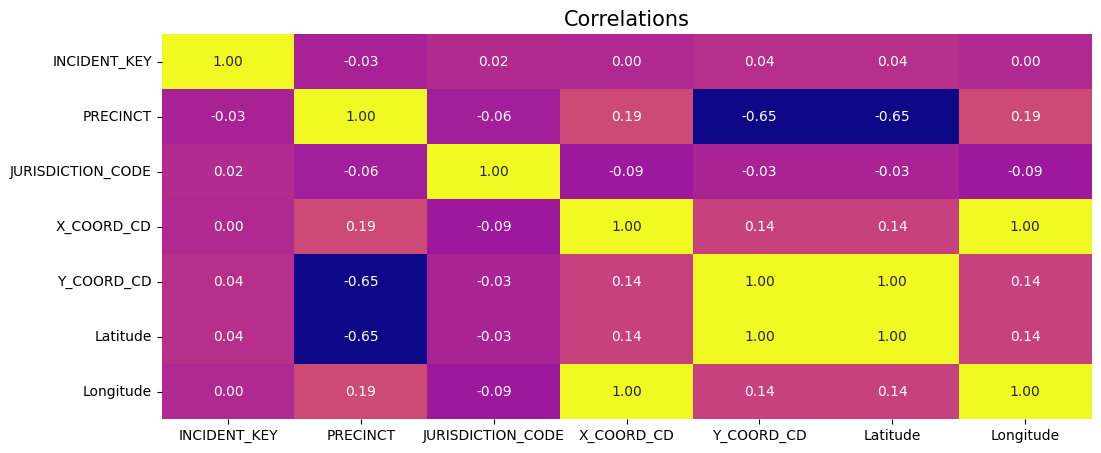

In [9]:
# Heatmap
plt.figure(figsize=(12, 5))
plt.title('Correlations', size=15)
sns.heatmap(data_numeric.corr(), cmap='plasma', annot=True, fmt='.2f', cbar=False)
plt.show()

In [10]:
categorical_columns = data.select_dtypes(include=['object']).columns

In [11]:
# Fill missing values
data.fillna(data_numeric.mean(), inplace=True)

In [12]:
for column in categorical_columns:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value,inplace=True)

**in above code i filled the categorical columns with the mode of that column.**

In [13]:
data

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME       BORO LOC_OF_OCCUR_DESC  \
0         228798151   5/27/2021   21:30:00     QUEENS           OUTSIDE   
1         137471050   6/27/2014   17:40:00      BRONX           OUTSIDE   
2         147998800  11/21/2015    3:56:00     QUEENS           OUTSIDE   
3         146837977   10/9/2015   18:30:00      BRONX           OUTSIDE   
4          58921844   2/19/2009   22:58:00      BRONX           OUTSIDE   
...             ...         ...        ...        ...               ...   
27307     245029823   5/14/2022    3:02:00      BRONX           OUTSIDE   
27308     239583450   1/22/2022   13:15:00  MANHATTAN           OUTSIDE   
27309     246825728   6/18/2022    3:29:00  MANHATTAN           OUTSIDE   
27310     246876579   6/19/2022   20:08:00      BRONX            INSIDE   
27311     239861542   1/28/2022   18:14:00      BRONX           OUTSIDE   

       PRECINCT  JURISDICTION_CODE LOC_CLASSFCTN_DESC  \
0           105                0.0             STREET   
1            40                0.0             STREET   
2           108                0.0             STREET   
3            44                0.0             STREET   
4            47                0.0             STREET   
...         ...                ...                ...   
27307        48                0.0             STREET   
27308        30                0.0             STREET   
27309        32                0.0             STREET   
27310        46                2.0            HOUSING   
27311        45                0.0             STREET   

                   LOCATION_DESC  STATISTICAL_MURDER_FLAG  ... PERP_SEX  \
0      MULTI DWELL - PUBLIC HOUS                    False  ...        M   
1      MULTI DWELL - PUBLIC HOUS                    False  ...        M   
2      MULTI DWELL - PUBLIC HOUS                     True  ...        M   
3      MULTI DWELL - PUBLIC HOUS                    False  ...        M   
4      MULTI DWELL - PUBLIC HOUS                     True  ...        M   
...                          ...                      ...  ...      ...   
27307                     (null)                    False  ...   (null)   
27308                     (null)                    False  ...        F   
27309                     (null)                    False  ...        M   
27310  MULTI DWELL - PUBLIC HOUS                    False  ...        M   
27311                     (null)                    False  ...        M   

            PERP_RACE VIC_AGE_GROUP VIC_SEX        VIC_RACE   X_COORD_CD  \
0               BLACK         18-24       M           BLACK  1058925.000   
1               BLACK         18-24       M           BLACK  1005028.000   
2               BLACK         25-44       M           WHITE  1007667.938   
3               BLACK           <18       M  WHITE HISPANIC  1006537.375   
4               BLACK         45-64       M           BLACK  1024921.813   
...               ...           ...     ...             ...          ...   
27307          (null)         18-24       M           BLACK  1011526.000   
27308  WHITE HISPANIC         25-44       M  WHITE HISPANIC   997458.000   
27309           BLACK         25-44       M           BLACK  1000999.000   
27310           BLACK         25-44       M  WHITE HISPANIC  1012980.000   
27311           BLACK         18-24       M           BLACK  1026549.000   

        Y_COORD_CD   Latitude  Longitude  \
0      180924.0000  40.662965 -73.730839   
1      234516.0000  40.810352 -73.924942   
2      209836.5313  40.742607 -73.915492   
3      244511.1406  40.837782 -73.919457   
4      262189.4063  40.886238 -73.852910   
...            ...        ...        ...   
27307  247828.0000  40.846864 -73.901413   
27308  240485.0000  40.826743 -73.952273   
27309  234464.0000  40.810209 -73.939496   
27310  251028.0000  40.855644 -73.896141   
27311  244293.0000  40.837102 -73.847134   

                                             Lon_Lat  
0      POINT (-73.73083

In [14]:
data.isnull().sum()

INCIDENT_KEY               0
OCCUR_DATE                 0
OCCUR_TIME                 0
BORO                       0
LOC_OF_OCCUR_DESC          0
PRECINCT                   0
JURISDICTION_CODE          0
LOC_CLASSFCTN_DESC         0
LOCATION_DESC              0
STATISTICAL_MURDER_FLAG    0
PERP_AGE_GROUP             0
PERP_SEX                   0
PERP_RACE                  0
VIC_AGE_GROUP              0
VIC_SEX                    0
VIC_RACE                   0
X_COORD_CD                 0
Y_COORD_CD                 0
Latitude                   0
Longitude                  0
Lon_Lat                    0
dtype: int64

#**Outliers Preprocessing**

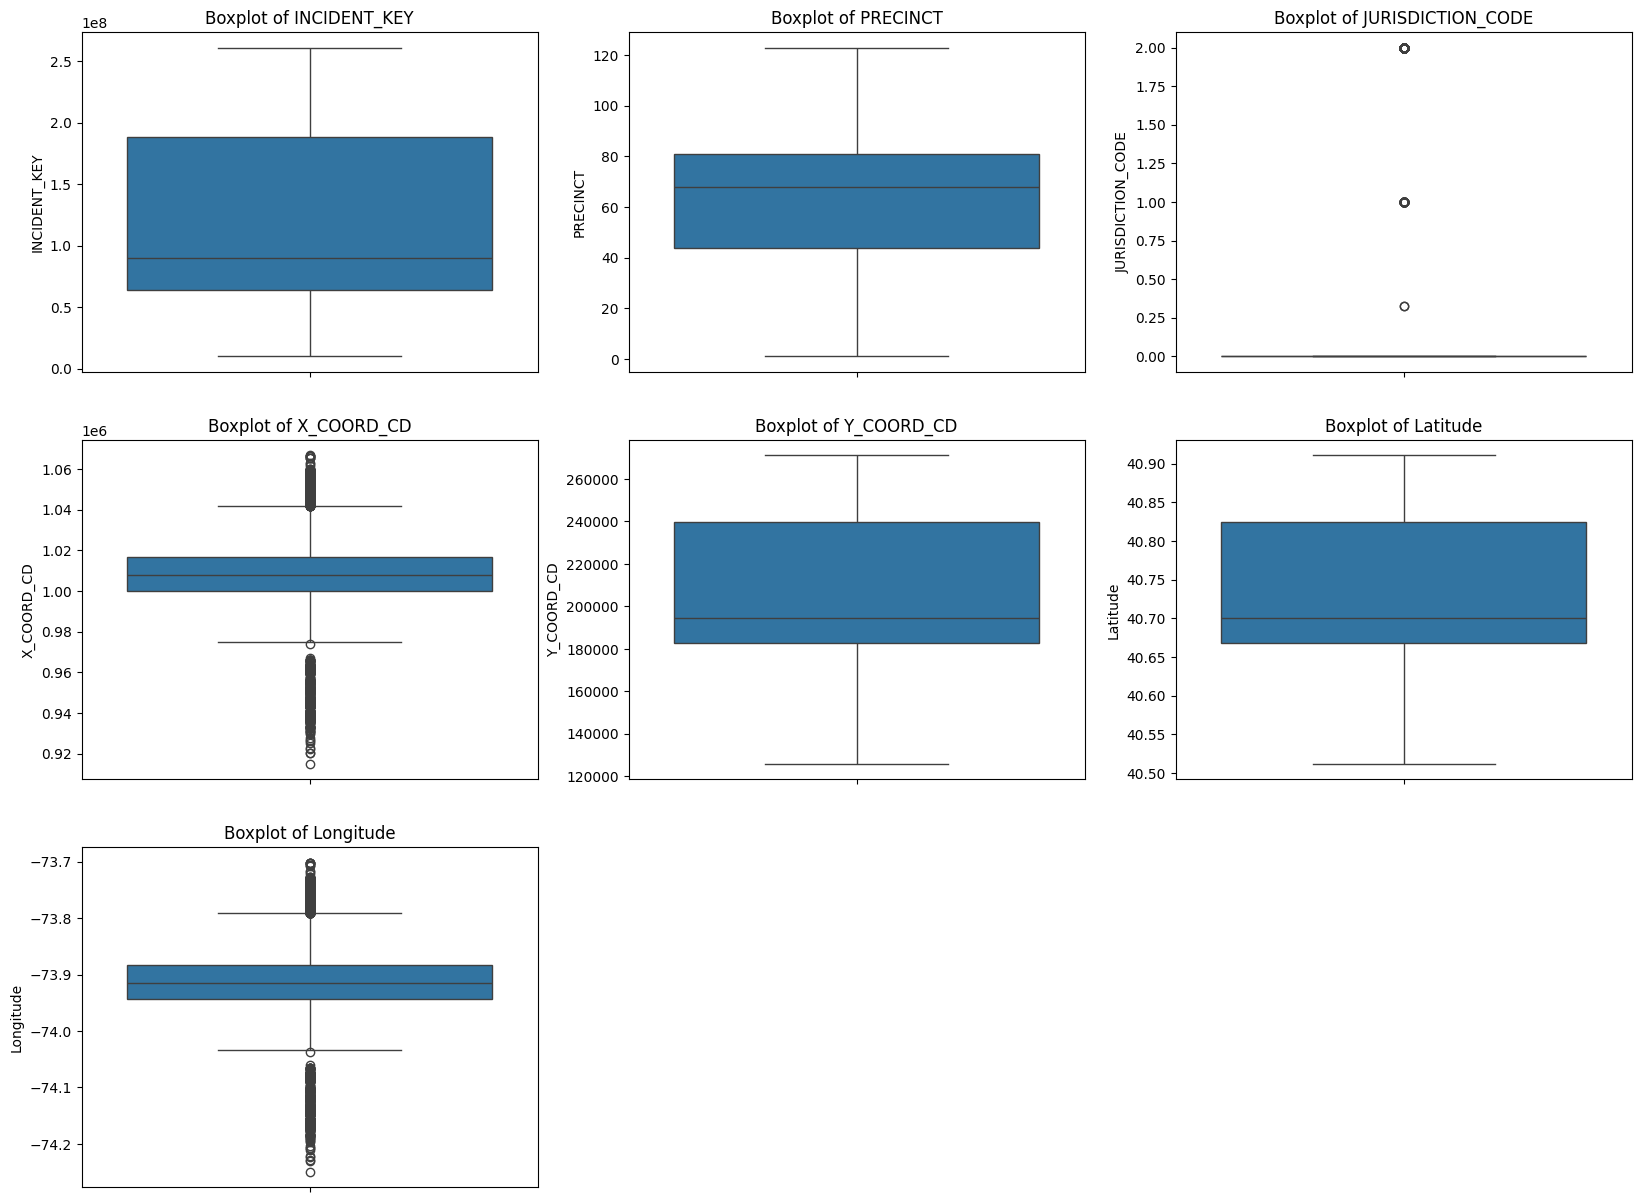

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for each numeric feature
numeric_columns = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.show()


In [16]:
# Function to remove outliers
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Apply outlier removal
for column in numeric_columns:
    data = remove_outliers(data, column)

**The provided code uses the Interquartile Range (IQR) method to identify and remove outliers from the dataset.**

In [17]:
print(f"Rows: {data.shape[0]}")
print(f"Columns: {data.shape[1]}")

Rows: 19733
Columns: 21


# create dummies of categorical columns

In [18]:
pd.get_dummies(data, columns=categorical_columns, drop_first=True)

INCIDENT_KEY  PRECINCT  JURISDICTION_CODE  STATISTICAL_MURDER_FLAG  \
1         137471050        40                0.0                    False   
2         147998800       108                0.0                     True   
3         146837977        44                0.0                    False   
4          58921844        47                0.0                     True   
5         219559682        81                0.0                     True   
...             ...       ...                ...                      ...   
27306     245173597        41                0.0                     True   
27307     245029823        48                0.0                    False   
27308     239583450        30                0.0                    False   
27309     246825728        32                0.0                    False   
27311     239861542        45                0.0                    False   

        X_COORD_CD   Y_COORD_CD   Latitude  Longitude  OCCUR_DATE_1/1/2007  \
1      1005028.000  234516.0000  40.810352 -73.924942                False   
2      1007667.938  209836.5313  40.742607 -73.915492                False   
3      1006537.375  244511.1406  40.837782 -73.919457                False   
4      1024921.813  262189.4063  40.886238 -73.852910                False   
5      1004234.313  186461.7031  40.678457 -73.927952                False   
...            ...          ...        ...        ...                  ...   
27306  1012932.000  238907.0000  40.822374 -73.896369                False   
27307  1011526.000  247828.0000  40.846864 -73.901413                False   
27308   997458.000  240485.0000  40.826743 -73.952273                False   
27309  1000999.000  234464.0000  40.810209 -73.939496                False   
27311  1026549.000  244293.0000  40.837102 -73.847134                False   

       OCCUR_DATE_1/1/2008  ...  \
1                    False  ...   
2                    False  ...   
3                    False  ...   
4                    False  ...   
5                    False  ...   
...                    ...  ...   
27306                False  ...   
27307                False  ...   
27308                False  ...   
27309                False  ...   
27311                False  ...   

       Lon_Lat_POINT (-74.01583121899995 40.648434817000066)  \
1                                                  False       
2                                                  False       
3                                                  False       
4                                                  False       
5                                                  False       
...                                                  ...       
27306                                              False       
27307                                              False       
27308                                              False       
27309                                              False       
27311                                              False       

       Lon_Lat_POINT (-74.015855807 40.64480573600008)  \
1                                                False   
2                                                False   
3                                                False   
4                                                False   
5                                                False   
...                                                ...   
27306                                            False   
27307                                            False   
27308                                            False   
27309                                            False   
27311                                            False   

       Lon_Lat_POINT (-74.01688574999997 40.642239258000075)  \
1                                                  False       
2                                                  False       
3                                                  False       
4 

# Define X and Y variables

In [69]:
# Define the features (X) and the output labels (y)
X = data.drop('STATISTICAL_MURDER_FLAG', axis=1)
y = data['STATISTICAL_MURDER_FLAG']

In [70]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="border-radius:10px; padding: 15px; background-color: blue; font-size:115%; text-align:left">
    
<h2 align="left"><font color=red>Conclusion:</font></h2>


| **Data Subset** | **Description**              | **Size**     |
|-----------------|------------------------------|--------------|
| `X_train`       | Features used for training    | 80% of X     |
| `y_train`       | Labels used for training      | 80% of y     |
| `X_test`        | Features used for testing     | 20% of X     |
| `y_test`        | Labels used for testing       | 20% of y     |


In [71]:
X_train.shape

(15786, 20)

In [72]:
X_test.shape

(3947, 20)

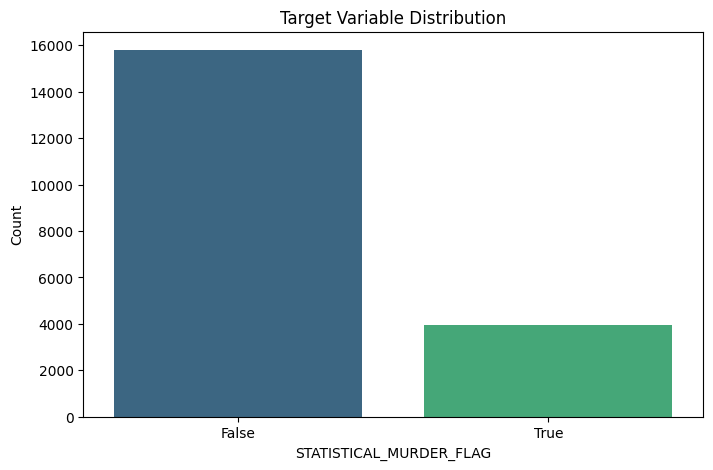

In [73]:
# Target Variable Analysis
if 'STATISTICAL_MURDER_FLAG' in data.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='STATISTICAL_MURDER_FLAG', data=data, palette='viridis')
    plt.title('Target Variable Distribution')
    plt.xlabel('STATISTICAL_MURDER_FLAG')
    plt.ylabel('Count')
    plt.show()

In [74]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    # Fit on the combined unique values from both train and test
    all_values = pd.concat([X_train[column], X_test[column]], ignore_index=True).unique()
    le.fit(all_values)
    X_train[column] = le.transform(X_train[column])
    X_test[column] = le.transform(X_test[column])
    label_encoders[column] = le

In [75]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align X_test with X_train columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [76]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###***All Models***

In [77]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'SVM': SVC(probability=True)
}

# Evaluate models

In [82]:
results = []
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    # Append results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

[LightGBM] [Info] Number of positive: 3169, number of negative: 12617
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2197
[LightGBM] [Info] Number of data points in the train set: 15786, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200747 -> initscore=-1.381629
[LightGBM] [Info] Start training from score -1.381629



# Create a results DataFrame




In [79]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.804915   0.000000  0.000000  0.000000  0.500000
1        Decision Tree  0.696478   0.219895  0.218182  0.219035  0.515292
2        Random Forest  0.776032   0.294964  0.106494  0.156489  0.522400
3    Gradient Boosting  0.805675   0.600000  0.011688  0.022930  0.504900
4              XGBoost  0.800101   0.462745  0.153247  0.230244  0.555062
5             LightGBM  0.801621   0.425287  0.048052  0.086348  0.516157
6                  SVM  0.805168   0.666667  0.002597  0.005175  0.501141


# Visualization of performance

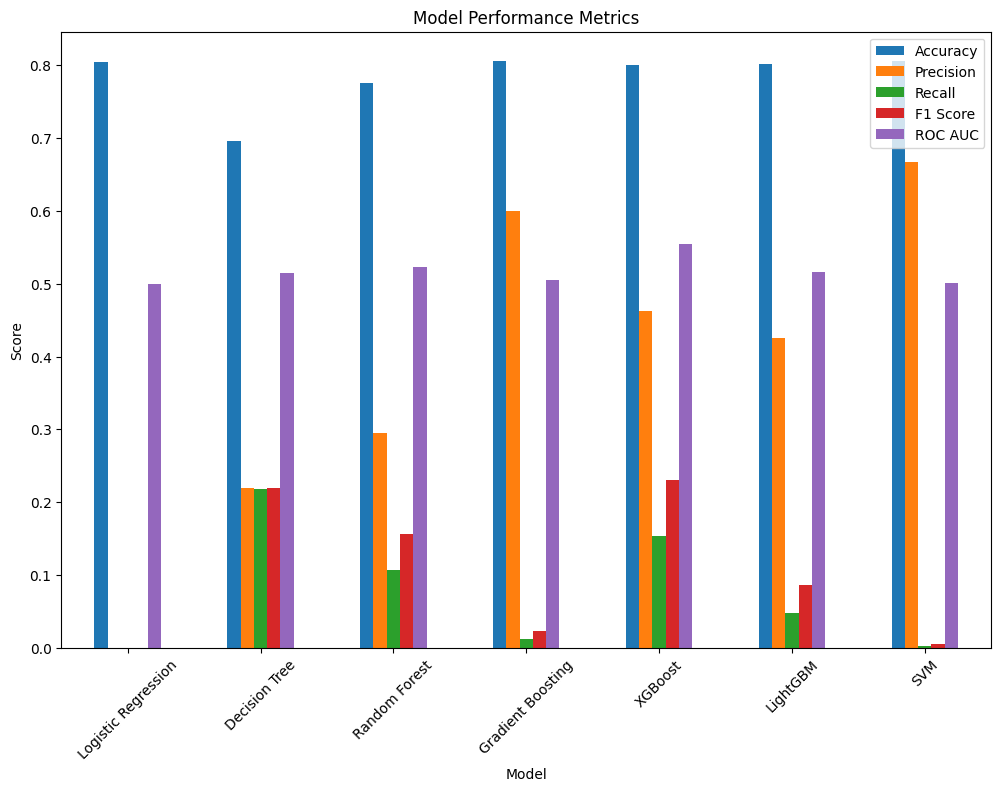

In [88]:
results_df.set_index('Model', inplace=True)
results_df.plot(kind='bar', figsize=(12, 8), title='Model Performance Metrics', ylabel='Score')
plt.xticks(rotation=45)
plt.show()

# **EDA on Best Model**

In [87]:
# Find the best model
best_model = max(results, key=lambda x: x['Accuracy'])  # Find the dictionary with the highest accuracy
best_model_name = best_model['Model']                    # Get the name of the best model
best_accuracy = best_model['Accuracy']                  # Get the accuracy of the best model

print(f"Best Model: {best_model_name} with accuracy: {best_accuracy:.4f}")

Best Model: Gradient Boosting with accuracy: 0.8057


In [90]:
# Print full classification report for the best model
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
best_cr = classification_report(y_test, y_pred_best)
print(f"Classification Report for {best_model_name}:\n\n{best_cr}")


Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

       False       0.81      1.00      0.89      3177
        True       0.60      0.01      0.02       770

    accuracy                           0.81      3947
   macro avg       0.70      0.50      0.46      3947
weighted avg       0.77      0.81      0.72      3947



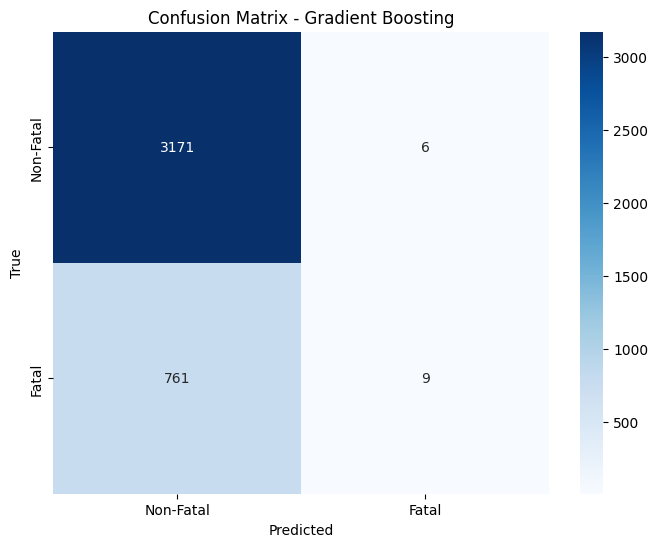

In [91]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fatal', 'Fatal'], yticklabels=['Non-Fatal', 'Fatal'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


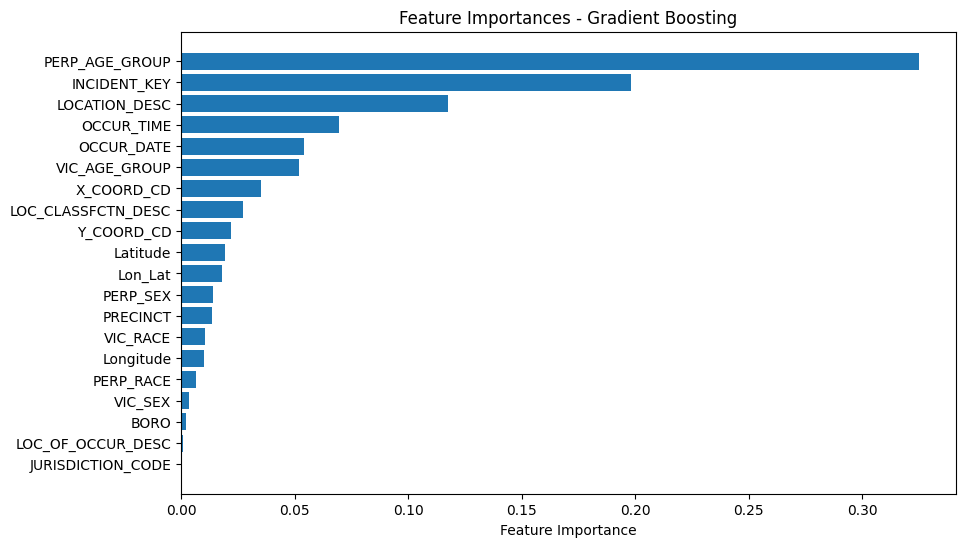

In [93]:
# Plot feature importances
feature_importances = best_model.feature_importances_

# Sort the features by importance
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
# Get feature names before scaling (from original DataFrame)
feature_names = data.drop('STATISTICAL_MURDER_FLAG', axis=1).columns
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in sorted_idx])  # Use feature_names here
plt.xlabel('Feature Importance')
plt.title('Feature Importances - Gradient Boosting')
plt.show()

**Feature Importance shows which features are most influential in predicting the target variable.**


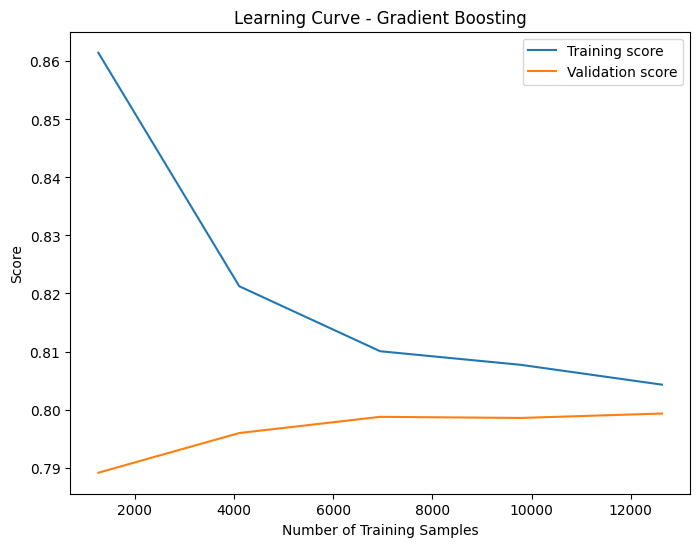

In [95]:
from sklearn.model_selection import learning_curve

# Calculate learning curve
train_sizes, train_scores, val_scores = learning_curve(best_model, X_train, y_train, cv=5)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Number of Training Samples')
plt.ylabel('Score')
plt.title('Learning Curve - Gradient Boosting')
plt.legend()
plt.show()


**Learning Curves provide insight into model overfitting or underfitting.**

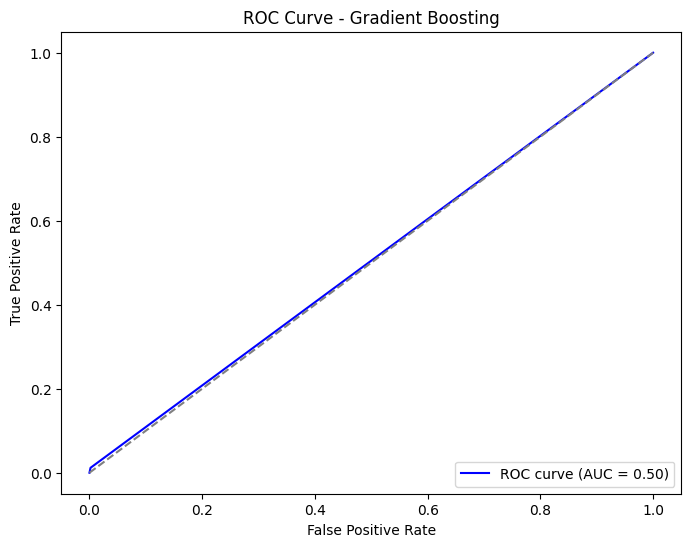

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_best)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


**ROC Curve and AUC help evaluate the model’s discriminative power.**